In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

In [307]:
data = pd.read_csv("C:/Users/JDPK/Downloads/user_behavior_dataset.csv")

In [308]:
data.shape

(700, 11)

In [309]:
data.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [310]:
data.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [311]:
data.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


In [312]:
data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [313]:
data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [315]:
data['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

In [316]:
data['Gender'].value_counts()

Gender
Male      364
Female    336
Name: count, dtype: int64

In [317]:
data['Operating System'].value_counts()

Operating System
Android    554
iOS        146
Name: count, dtype: int64

In [318]:
data['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [319]:
data = data.drop(columns=['User ID'])

In [320]:
data.rename(columns={
    'Device Model': 'device_model',
    'Operating System': 'os',
    'App Usage Time (min/day)': 'usage_min',
    'Screen On Time (hours/day)': 'screen_time_hr',
    'Battery Drain (mAh/day)': 'battery_drain',
    'Number of Apps Installed': 'num_apps',
    'Data Usage (MB/day)': 'data_usage_mb',
    'Age': 'age',
    'Gender': 'gender',
    'User Behavior Class': 'behavior_class'
}, inplace=True)

### Explanation of Short Names
    user_id: User ID
    device_model: Device Model
    os: Operating System
    usage_min: App Usage Time (minutes per day)
    screen_time_hr: Screen On Time (hours per day)
    battery_drain: Battery Drain (mAh per day)
    num_apps: Number of Apps Installed
    data_usage_mb: Data Usage (MB per day)
    age: Age
    gender: Gender
    behavior_class: User Behavior Class

In [321]:
data.columns

Index(['device_model', 'os', 'usage_min', 'screen_time_hr', 'battery_drain',
       'num_apps', 'data_usage_mb', 'age', 'gender', 'behavior_class'],
      dtype='object')

In [322]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(num_cols)
print(cat_cols)

['usage_min', 'screen_time_hr', 'battery_drain', 'num_apps', 'data_usage_mb', 'age', 'behavior_class']
['device_model', 'os', 'gender']


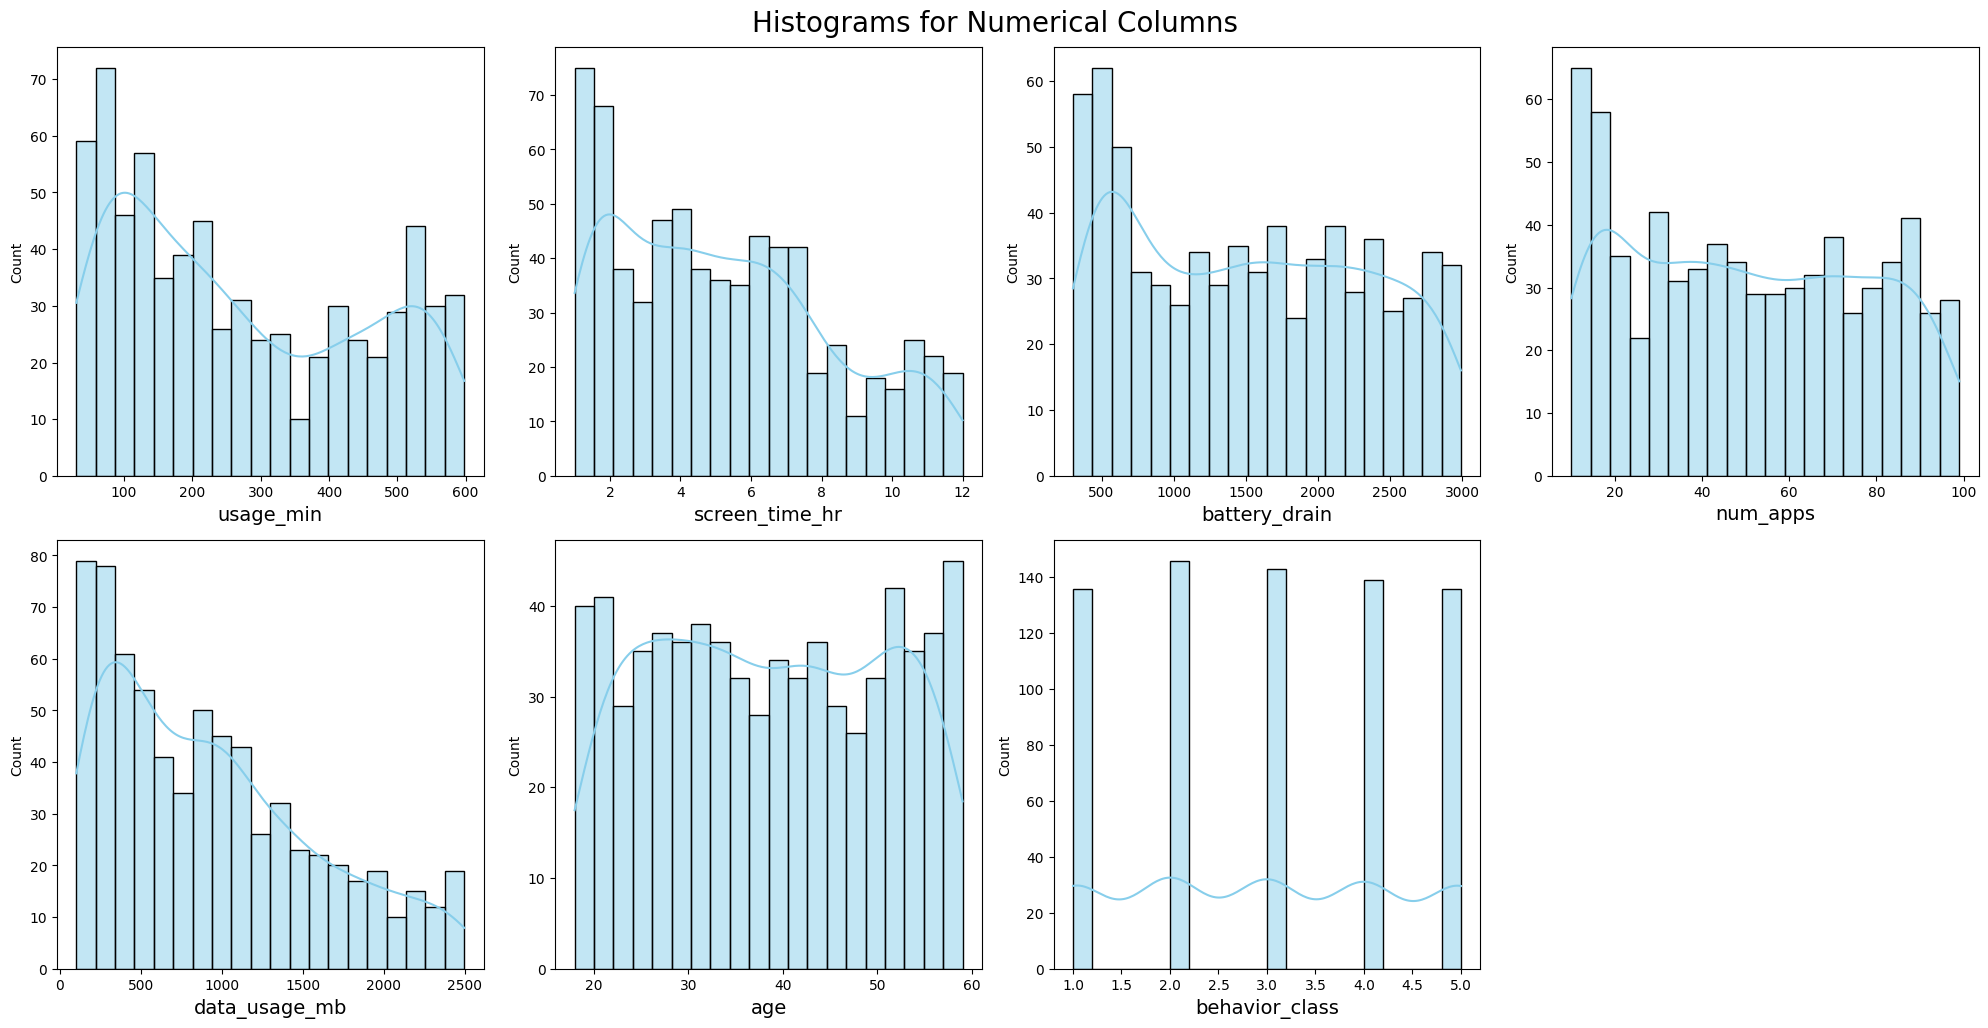

In [323]:
# Create a figure with a specified size (20x20 inches)
plt.figure(figsize=(20, 20))

# Initialize a variable to keep track of the subplot index
pt = 1

# Loop through each numerical column to create individual histograms
for column in num_cols:
    # Create a subplot (4x4 grid) for each column, with 'pt' controlling the position
    ax = plt.subplot(4, 4, pt)

    # Create a histogram for the current column, with 20 bins and a KDE curve
    sns.histplot(data[column], ax=ax, bins=20, kde=True, color='skyblue')

    # Set the x-axis label with the column name and increase the font size to 14
    ax.set_xlabel(column, fontsize=14)

    # Increment the subplot index for the next column
    pt += 1

# Set a common title for all the histograms, with large font size (20) and center alignment
plt.suptitle('Histograms for Numerical Columns', fontsize=20, ha='center')

# Adjust the layout to prevent overlap and ensure a margin at the top for the title
plt.tight_layout(rect=[0, 0, 1, 0.99])  # rect=[0, 0, 1, 0.99] leaves 1% space at the top for the title

# Display the plots
plt.show()



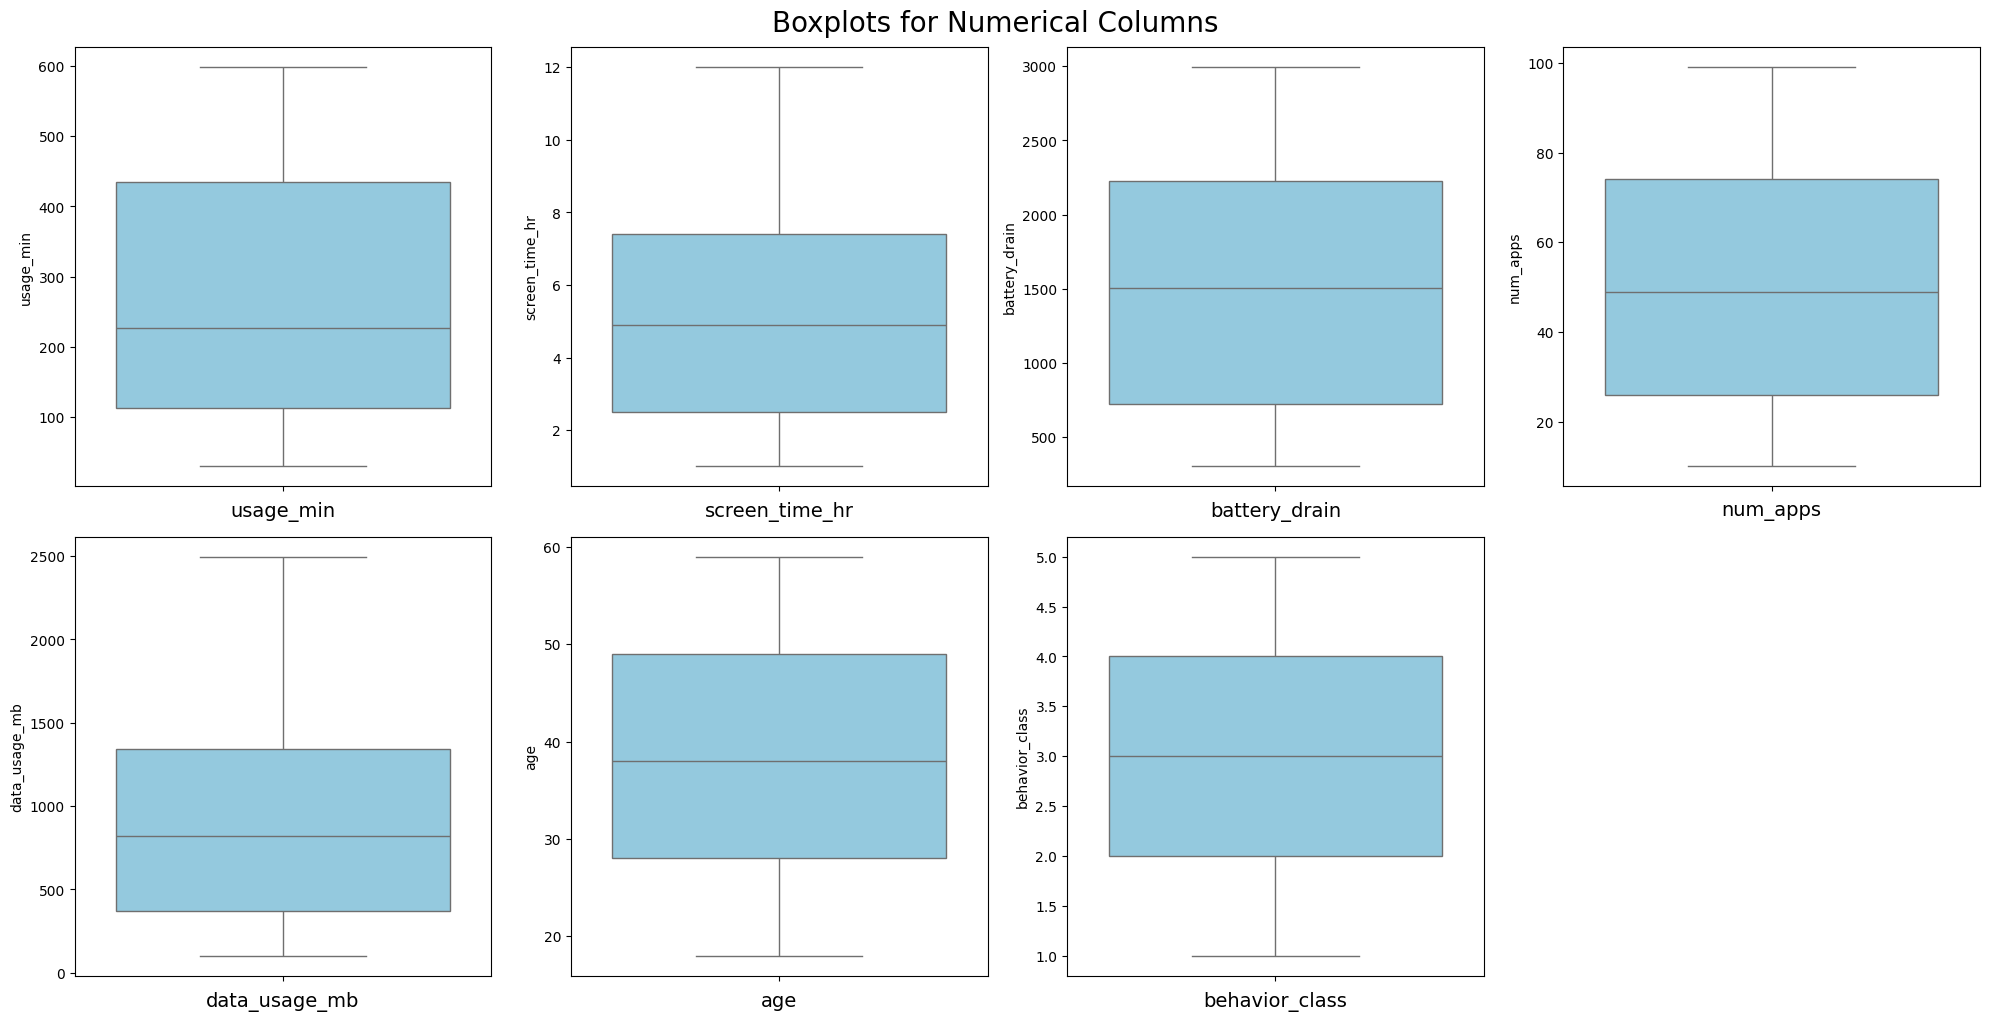

In [324]:
# Create a figure with a specified size (20x20 inches)
plt.figure(figsize=(20, 20))

# Initialize a variable to keep track of the subplot index
pt = 1

# Loop through each numerical column to create individual histograms
for column in num_cols:
    # Create a subplot (4x4 grid) for each column, with 'pt' controlling the position
    ax = plt.subplot(4, 4, pt)

    # Create a histogram for the current column, with 20 bins and a KDE curve
    sns.boxplot(data[column], ax=ax, color='skyblue')

    # Set the x-axis label with the column name and increase the font size to 14
    ax.set_xlabel(column, fontsize=14)

    # Increment the subplot index for the next column
    pt += 1

# Set a common title for all the histograms, with large font size (20) and center alignment
plt.suptitle('Boxplots for Numerical Columns', fontsize=20, ha='center')

# Adjust the layout to prevent overlap and ensure a margin at the top for the title
plt.tight_layout(rect=[0, 0, 1, 0.99])  # rect=[0, 0, 1, 0.99] leaves 1% space at the top for the title

# Display the plots
plt.show()



In [325]:
# Calculate the IQR for each numerical column and identify outliers
for column in num_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers in the current column
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f'Outliers in {column}:')
    print(outliers[[column]])
    print(f'Number of outliers: {len(outliers)}\n')

Outliers in usage_min:
Empty DataFrame
Columns: [usage_min]
Index: []
Number of outliers: 0

Outliers in screen_time_hr:
Empty DataFrame
Columns: [screen_time_hr]
Index: []
Number of outliers: 0

Outliers in battery_drain:
Empty DataFrame
Columns: [battery_drain]
Index: []
Number of outliers: 0

Outliers in num_apps:
Empty DataFrame
Columns: [num_apps]
Index: []
Number of outliers: 0

Outliers in data_usage_mb:
Empty DataFrame
Columns: [data_usage_mb]
Index: []
Number of outliers: 0

Outliers in age:
Empty DataFrame
Columns: [age]
Index: []
Number of outliers: 0

Outliers in behavior_class:
Empty DataFrame
Columns: [behavior_class]
Index: []
Number of outliers: 0



In [326]:
data.columns

Index(['device_model', 'os', 'usage_min', 'screen_time_hr', 'battery_drain',
       'num_apps', 'data_usage_mb', 'age', 'gender', 'behavior_class'],
      dtype='object')

In [327]:
# Label Encoding for 'Gender' and 'Operating System' (binary column)
# Initialize LabelEncoders
# Reason: We use different LabelEncoders for each column to ensure that each categorical feature has its own independent encoding and mapping.
gender_encoder = LabelEncoder()
os_encoder = LabelEncoder()
device_model_encoder = LabelEncoder()

# Fit and transform categorical columns
data['gender'] = gender_encoder.fit_transform(data['gender'])
data['os'] = os_encoder.fit_transform(data['os'])
data['device_model'] = device_model_encoder.fit_transform(data['device_model'])

# One-Hot Encoding for 'Device Model' (nominal columns)
#  data = pd.get_dummies(data, columns=['device_model','os', 'gender'], drop_first=True)

In [328]:
data['os'].value_counts()

os
0    554
1    146
Name: count, dtype: int64

In [329]:
data['gender'].value_counts()

gender
1    364
0    336
Name: count, dtype: int64

In [330]:
data['device_model'].value_counts()

device_model
3    146
4    146
0    142
1    133
2    133
Name: count, dtype: int64

In [331]:
data.columns

Index(['device_model', 'os', 'usage_min', 'screen_time_hr', 'battery_drain',
       'num_apps', 'data_usage_mb', 'age', 'gender', 'behavior_class'],
      dtype='object')

In [332]:
# Standardization (Z-score scaling)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[num_cols])

# Convert them back to DataFrame:
data_scaled_standard = pd.DataFrame(data_scaled, columns=num_cols)

In [333]:
data_scaled_standard.shape

(700, 7)

In [334]:
data_scaled_standard.head()

,usage_min,screen_time_hr,battery_drain,num_apps,data_usage_mb,age,behavior_class
0,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383,0.721184
1,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506,0.007140
2,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989,-0.706903
3,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682,0.007140
4,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346,0.007140


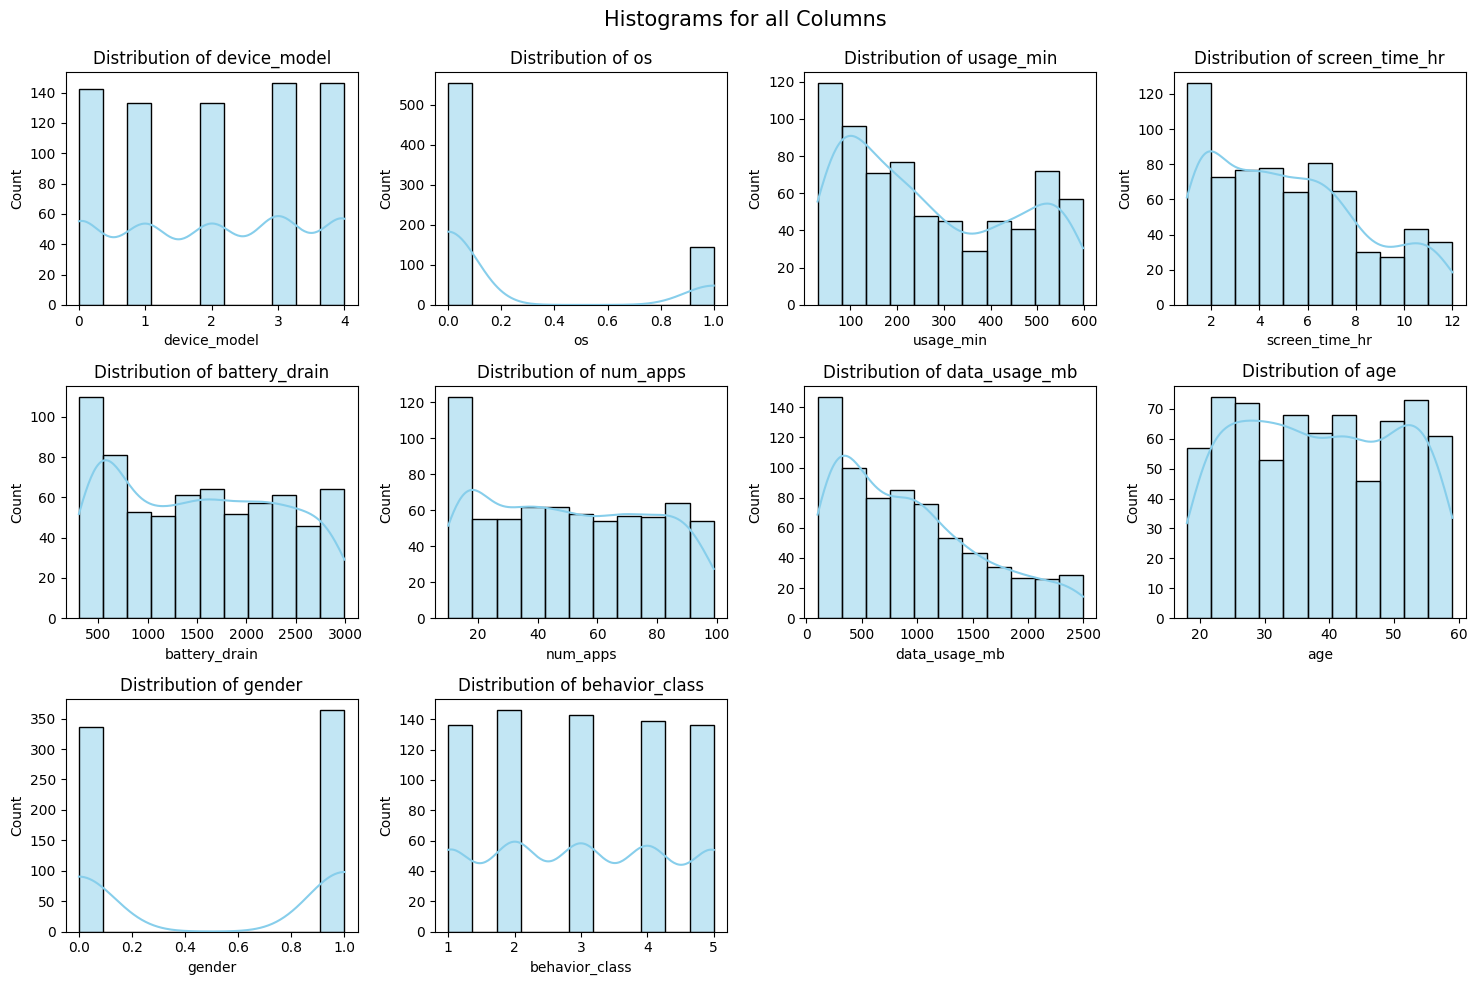

In [335]:
# Set up the size of the plots
plt.figure(figsize=(15, 10))

# Loop through each feature and create a distribution plot
for i, column in enumerate(data.columns):
    plt.subplot(3, 4, i+1)  # Adjust the number of rows and columns based on the number of features
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.suptitle('Histograms for all Columns', fontsize=15, ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [336]:
data.columns

Index(['device_model', 'os', 'usage_min', 'screen_time_hr', 'battery_drain',
       'num_apps', 'data_usage_mb', 'age', 'gender', 'behavior_class'],
      dtype='object')

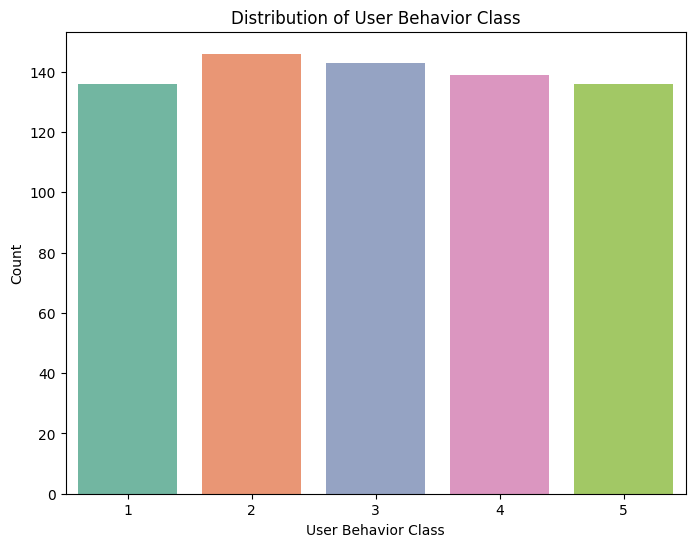

behavior_class
2    0.208571
3    0.204286
4    0.198571
5    0.194286
1    0.194286
Name: proportion, dtype: float64


In [337]:
# Visualize class distribution in 'user_behavior_class'
plt.figure(figsize=(8, 6))
sns.countplot(x='behavior_class', data=data, palette='Set2', hue='behavior_class', legend=False)
plt.title('Distribution of User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.show()



# Check for imbalance by calculating the percentage distribution
behavior_class_counts = data['behavior_class'].value_counts(normalize=True)
print(behavior_class_counts)

In [338]:
data['behavior_class'].value_counts()

behavior_class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

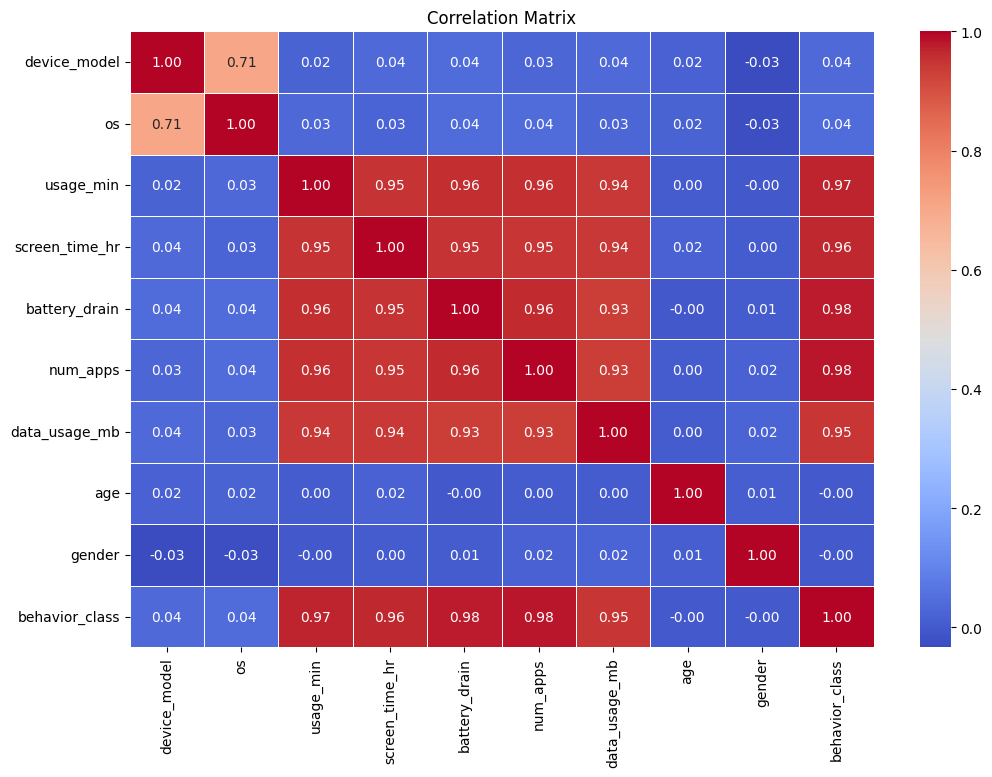

In [339]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [340]:
# Get the highly correlated pairs (correlation > 0.9)
highly_correlated = corr_matrix.unstack().sort_values(ascending=False)
highly_correlated = highly_correlated[highly_correlated < 1.0]      # Remove self-correlation (1.0 values)
highly_correlated = highly_correlated[highly_correlated > 0.9]      # Filter correlations > 0.9
# Remove redundant pairs (i.e., keep only one of the pair: (A, B) and (B, A))
highly_correlated = highly_correlated[highly_correlated.index.get_level_values(0) < highly_correlated.index.get_level_values(1)]

print(highly_correlated)

behavior_class  num_apps          0.981255
battery_drain   behavior_class    0.978587
behavior_class  usage_min         0.970498
                screen_time_hr    0.964581
battery_drain   num_apps          0.961853
                usage_min         0.956385
num_apps        usage_min         0.955253
screen_time_hr  usage_min         0.950333
battery_drain   screen_time_hr    0.948983
num_apps        screen_time_hr    0.946975
behavior_class  data_usage_mb     0.946734
data_usage_mb   usage_min         0.942308
                screen_time_hr    0.941322
                num_apps          0.934800
battery_drain   data_usage_mb     0.932276
dtype: float64


In [341]:
# Step 1: Select numerical features for VIF calculation
numerical_data = data.select_dtypes(include=[np.number])

# Step 2: Initialize a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_data.columns

# Step 3: Calculate the VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]

# Step 4: Display the VIF values to identify multicollinearity
print(vif_data)

          Feature         VIF
0    device_model    5.654411
1              os    2.486330
2       usage_min   61.019454
3  screen_time_hr   64.500431
4   battery_drain  106.410287
5        num_apps  120.731233
6   data_usage_mb   35.268678
7             age    6.932876
8          gender    2.003988
9  behavior_class  257.302647


In [342]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return (vif)

calc_vif(data[[i for i in data.describe().columns if i not in ["behavior_class"]]])

,variables,VIF
0,device_model,5.431997
1,os,2.469241
2,usage_min,59.258951
3,screen_time_hr,60.225763
4,battery_drain,80.679918
5,num_apps,79.409990
6,data_usage_mb,35.230453
7,age,5.526161
8,gender,1.996027


In [343]:
calc_vif(data[[i for i in data.describe().columns if i not in ["battery_drain", "behavior_class", "num_apps"]]])

,variables,VIF
0,device_model,5.335155
1,os,2.465240
2,usage_min,43.991396
3,screen_time_hr,49.413651
4,data_usage_mb,34.288126
5,age,4.982765
6,gender,1.960620


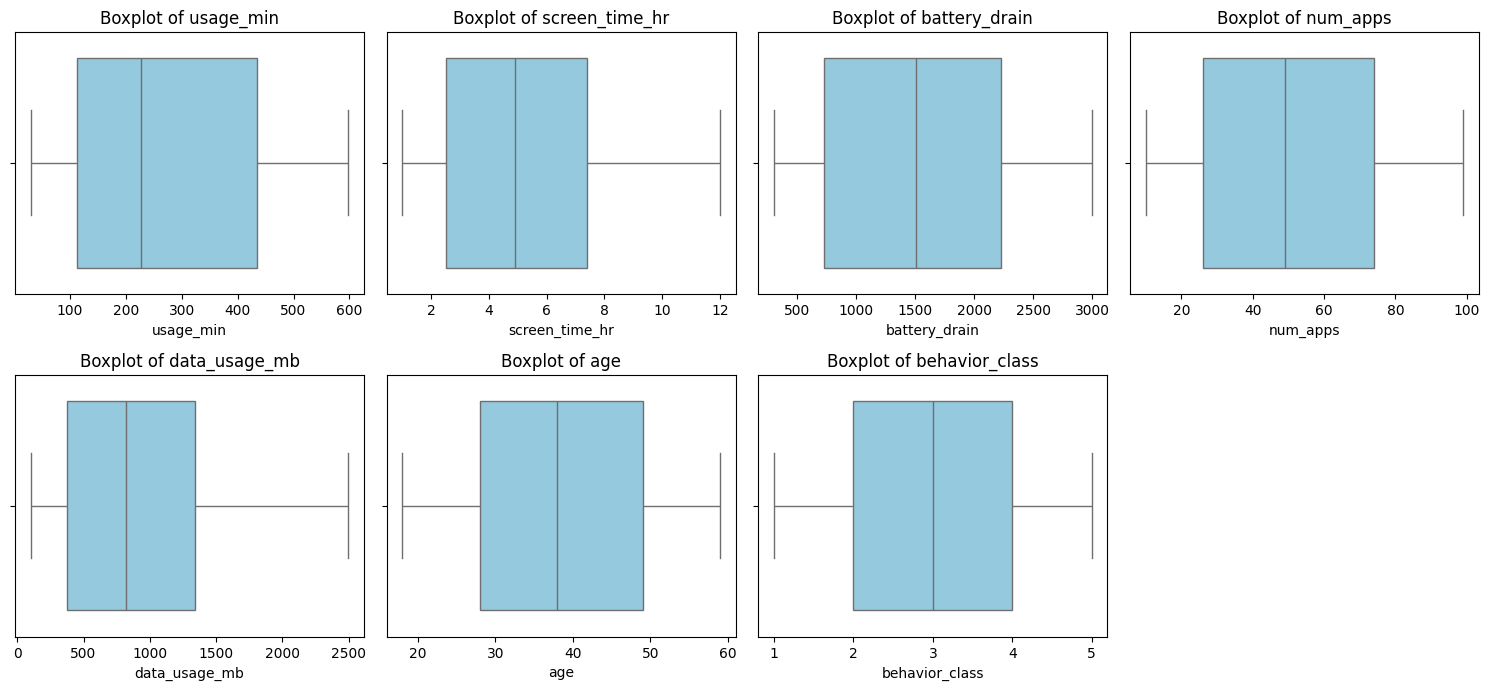

In [344]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_cols):
    plt.subplot(3, 4, i+1)  # Adjust the number of rows and columns
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

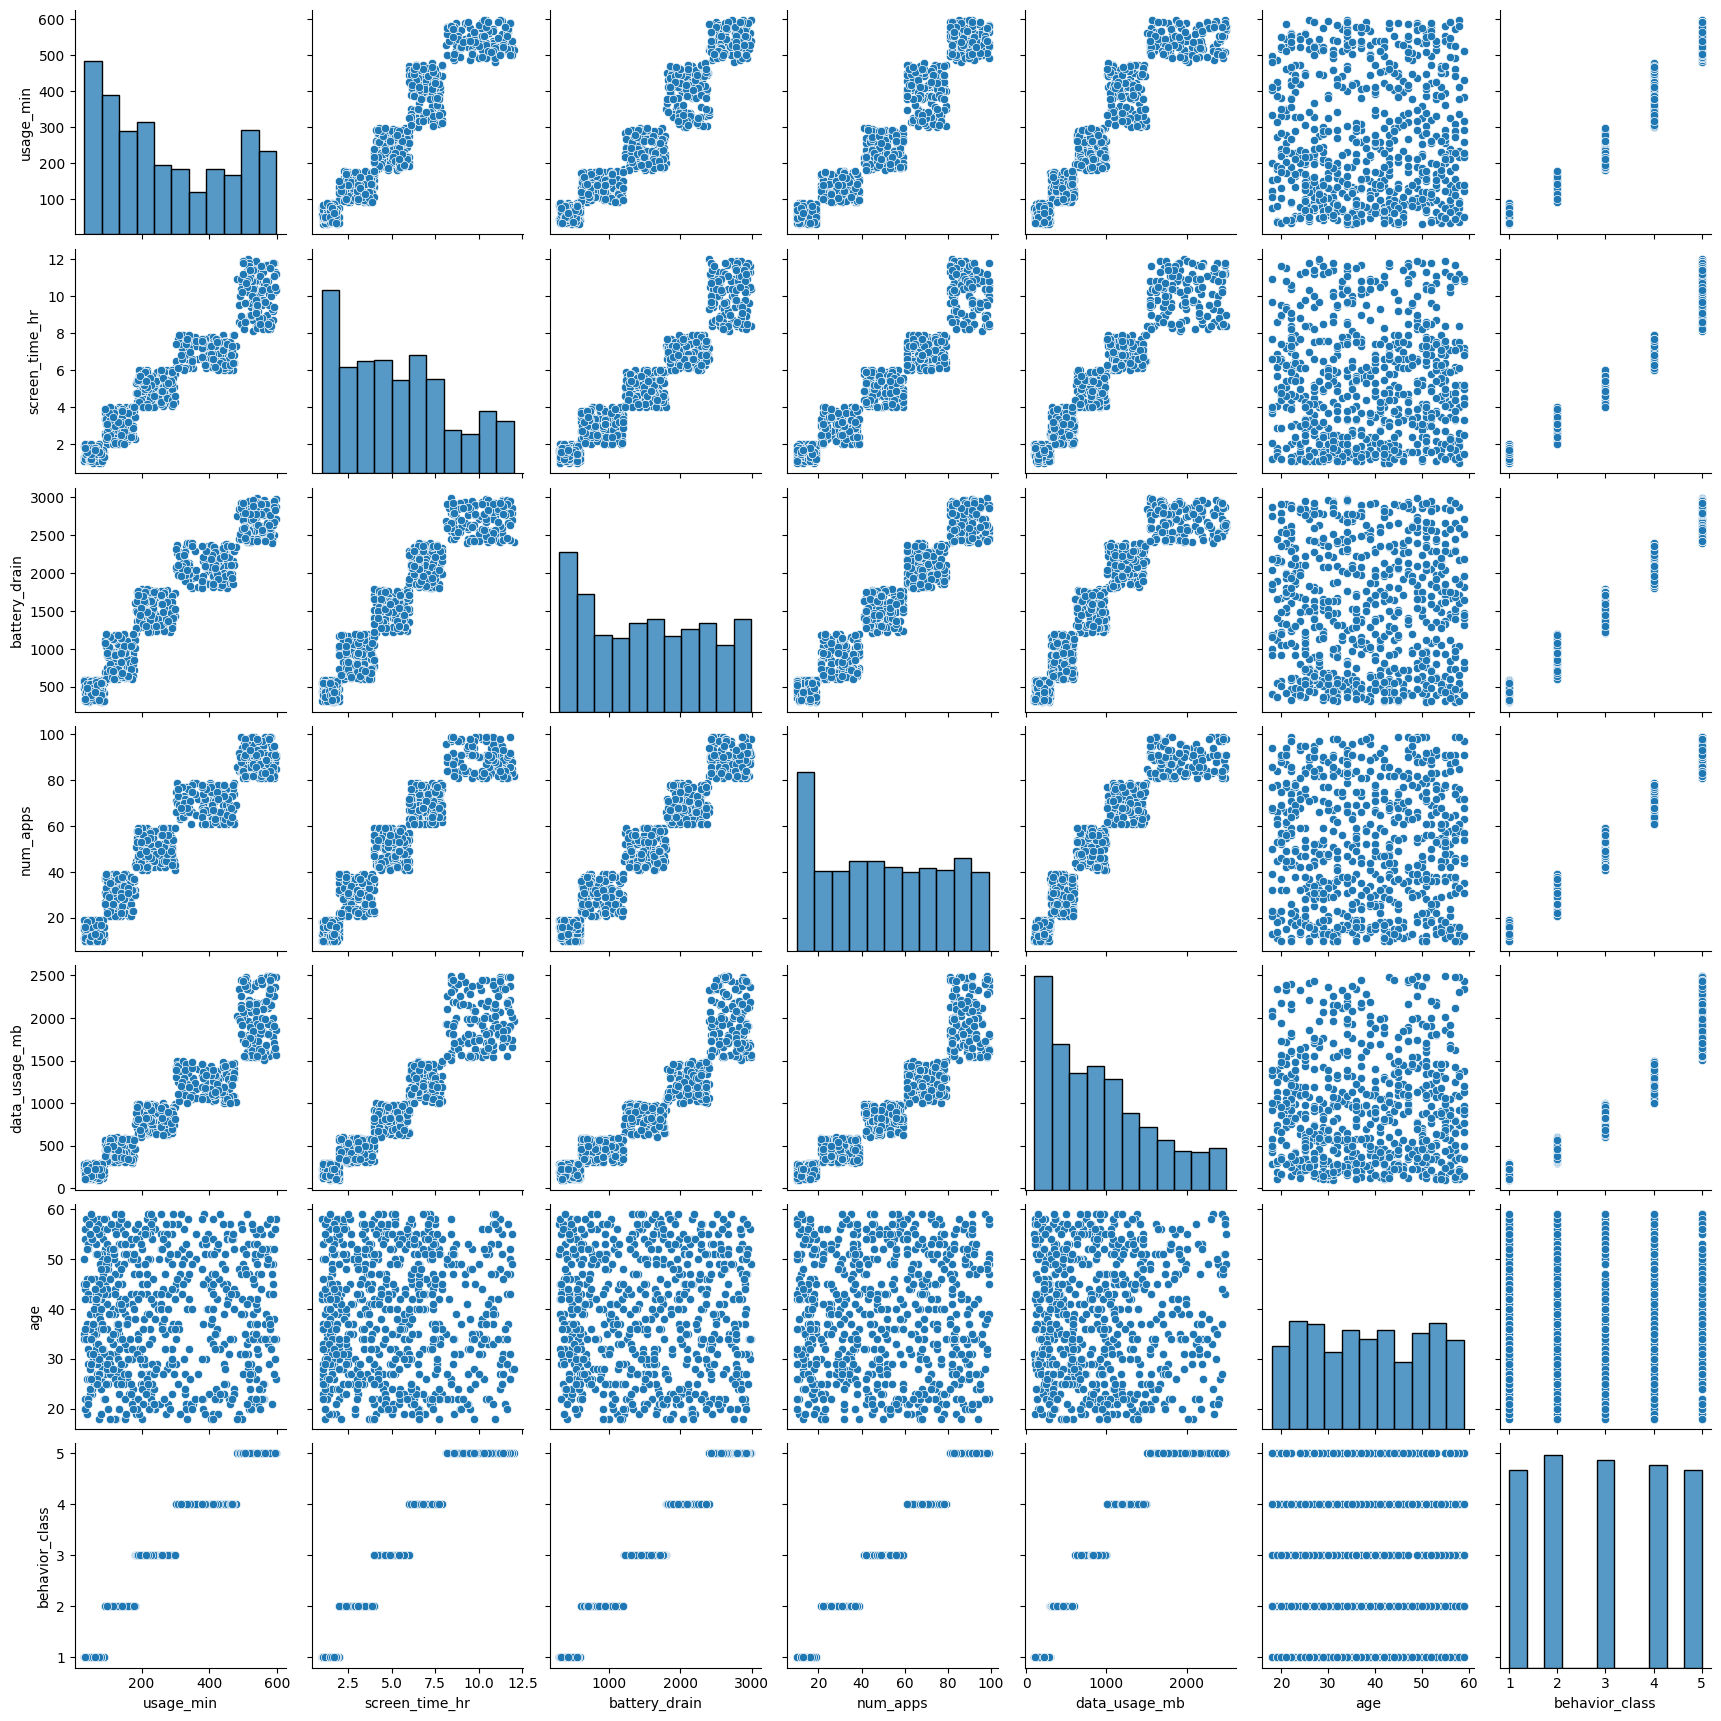

In [345]:
sns.pairplot(data[num_cols ])

In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance

In [347]:
# Create a dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

In [348]:
data.columns

Index(['device_model', 'os', 'usage_min', 'screen_time_hr', 'battery_drain',
       'num_apps', 'data_usage_mb', 'age', 'gender', 'behavior_class'],
      dtype='object')

In [349]:
# X = features (excluding the target column)
# y = target (behavior_class)

X = data.drop(columns=['behavior_class', 'battery_drain'])
y = data['behavior_class']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [350]:
X.shape

(700, 8)

In [351]:
X.columns

Index(['device_model', 'os', 'usage_min', 'screen_time_hr', 'num_apps',
       'data_usage_mb', 'age', 'gender'],
      dtype='object')

In [352]:
X_train.columns

Index(['device_model', 'os', 'usage_min', 'screen_time_hr', 'num_apps',
       'data_usage_mb', 'age', 'gender'],
      dtype='object')

In [353]:
y.value_counts()

behavior_class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

In [354]:
# Initialize classifiers
lr_clf = LogisticRegression(max_iter=4000, solver='saga', random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

In [355]:
# Define a function to evaluate each model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Evaluate Logistic Regression, Random Forest, Gradient Boosting
lr_results = evaluate_model(lr_clf, X_train, X_test, y_train, y_test)
rf_results = evaluate_model(rf_clf, X_train, X_test, y_train, y_test)
gb_results = evaluate_model(gb_clf, X_train, X_test, y_train, y_test)


# Print the results for each model
print("Logistic Regression - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(*lr_results))
print("Random Forest - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(*rf_results))
print("Gradient Boosting - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(*gb_results))

Logistic Regression - Accuracy: 0.70, Precision: 0.72, Recall: 0.70, F1: 0.70
Random Forest - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00
Gradient Boosting - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


### Model Evaluation Results:

1. **Logistic Regression:**
   - **Accuracy**: 0.70
   - **Precision**: 0.72
   - **Recall**: 0.70
   - **F1-Score**: 0.70

   Logistic Regression shows a moderate performance with reasonably balanced precision, recall, and F1-score around 0.70. While it may work well for some applications, its performance could be improved, especially in handling more complex or imbalanced datasets.

2. **Random Forest:**
   - **Accuracy**: 1.00
   - **Precision**: 1.00
   - **Recall**: 1.00
   - **F1-Score**: 1.00

   Random Forest achieved perfect performance on the test set with 100% accuracy, precision, recall, and F1-score. This indicates that the model is overfitting to the data, as it perfectly memorizes the training data. This could happen when:
   - The dataset is small or simple.
   - The model is too complex (too many trees or too deep).

   While this is an excellent result on the training data, it raises concerns about the model's ability to generalize to unseen data. Overfitting could be mitigated by tuning the model's hyperparameters or using regularization techniques.

3. **Gradient Boosting:**
   - **Accuracy**: 1.00
   - **Precision**: 1.00
   - **Recall**: 1.00
   - **F1-Score**: 1.00

   Similar to Random Forest, Gradient Boosting achieved perfect performance on the test set. This perfect score suggests potential overfitting for the same reasons as Random Forest.

### Overfitting Warning:

   - Both **Random Forest** and **Gradient Boosting** performed perfectly on the test set, which typically signals overfitting. 
   - Overfitting occurs when a model memorizes the training data but fails to generalize well to new, unseen data. The perfect performance on the test set could be because the models have learned the noise in the data, rather than the actual patterns.



In [356]:
from sklearn.model_selection import cross_val_score

In [357]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5)
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

# Applying 10-fold cross-validation
cv_scores_rf = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy')
cv_scores_gb = cross_val_score(gb_clf, X_train, y_train, cv=10, scoring='accuracy')

print("Random Forest Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(cv_scores_rf.mean(), cv_scores_rf.std()))
print(f"Gradient Boosting Cross-Validation Accuracy: {cv_scores_gb.mean():.2f} ± {cv_scores_gb.std():.2f}")

Random Forest Cross-Validation Accuracy: 1.00 ± 0.00
Gradient Boosting Cross-Validation Accuracy: 1.00 ± 0.00


In [358]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Define SMOTE instance
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)





In [359]:
# Check the new class distribution after resampling
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: behavior_class
2    117
5    113
4    112
3    109
1    109
Name: count, dtype: int64
After SMOTE: behavior_class
4    117
3    117
2    117
1    117
5    117
Name: count, dtype: int64


In [360]:
# Define a function to evaluate each model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Evaluate Random Forest and Gradient Boosting models
rf_results = evaluate_model(rf_clf, X_train_resampled, X_test, y_train_resampled, y_test)
gb_results = evaluate_model(gb_clf, X_train_resampled, X_test, y_train_resampled, y_test)

# Print the results for each model
print("Random Forest - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(*rf_results))
print("Gradient Boosting - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(*gb_results))

Random Forest - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00
Gradient Boosting - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


In [361]:
# Again applying 10-fold cross-validation
cv_scores_rf = cross_val_score(rf_clf, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
cv_scores_gb = cross_val_score(gb_clf, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

print("Random Forest Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(cv_scores_rf.mean(), cv_scores_rf.std()))
print("Gradient Boosting Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(cv_scores_gb.mean(), cv_scores_gb.std()))


Random Forest Cross-Validation Accuracy: 1.00 ± 0.00
Gradient Boosting Cross-Validation Accuracy: 1.00 ± 0.00


### Insights and Reporting

#### 1. Model Interpretation and Comparison
- **Logistic Regression**: Achieved moderate scores (Accuracy: 0.70, Precision: 0.72, Recall: 0.70, F1: 0.70), providing a general baseline but lacking complexity capture.
- **Random Forest & Gradient Boosting**: Both models showed perfect metrics (Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00) even with cross-validation and SMOTE. This high performance may indicate overfitting, warranting further validation.

#### 2. Key Features Influencing User Behavior Classification
- **Feature Importance**: 
  - **Usage Metrics** (e.g., screen time, usage minutes, data usage): Likely important as they reflect the user's level of engagement.
  - **Device-Related** (e.g., battery drain, number of apps installed): High values may indicate "power users" who engage more intensively with their devices.
  - **Demographics** (e.g., age and gender): These attributes often correlate with differing behavior patterns in digital environments.
- **VIF Analysis**: Identified multicollinearity in features like battery drain and app count, indicating a potential for further feature reduction.

#### 3. Actionable Insights
- **Personalized Engagement**: Tailor notifications, content, or data-saving options to high-usage users.
- **Battery Optimization**: Suggest device management tips to users with high battery drain.
- **Age-Specific Recommendations**: Personalize content based on age to boost engagement.

#### 4. Summary and Potential Applications
- **Summary**: Random Forest and Gradient Boosting models show near-perfect classification (though possibly overfitting), while Logistic Regression offers a more generalized baseline.
- **Applications**:
  - **User Behavior Prediction**: Classify users to enable tailored interactions.
  - **Customer Retention**: Target high-engagement users for enhanced satisfaction.
  - **Behavioral Insights**: Leverage insights to refine products and decision-making.


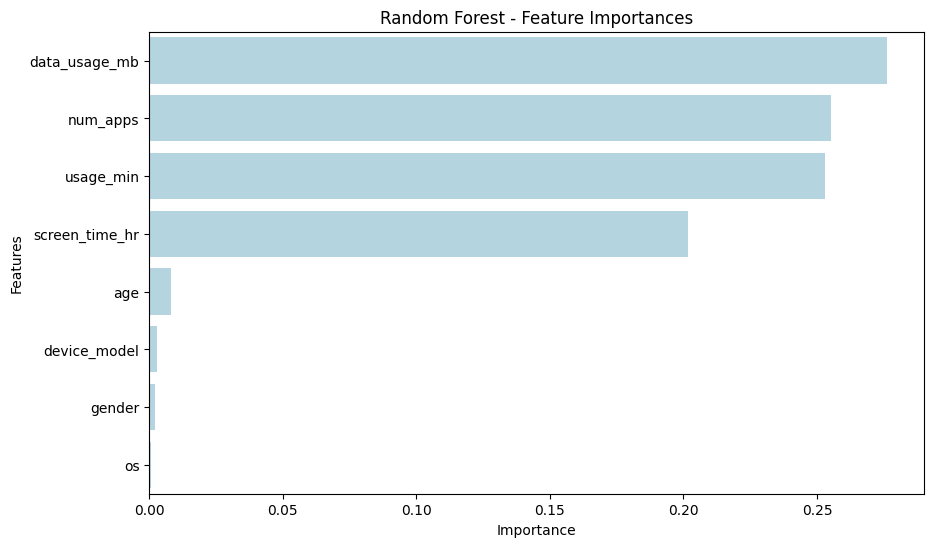

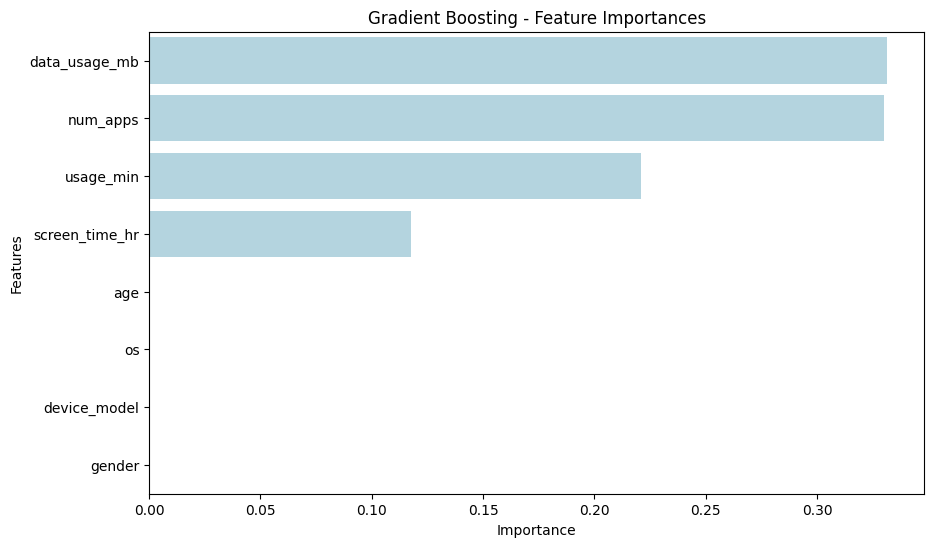

In [362]:
# Feature Importance for Random Forest and Gradient Boosting (Tree-Based Models)
# Plot Feature Importance for Random Forest and Gradient Boosting
for model_name, model in zip(["Random Forest", "Gradient Boosting"], [rf_clf, gb_clf]):
    feature_importances = model.feature_importances_
    sorted_indices = feature_importances.argsort()[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], color='lightblue')
    plt.title(f"{model_name} - Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [363]:
import joblib

In [364]:

# Define and train models and label encoders
# rf_clf = RandomForestClassifier(random_state=42)
# gb_clf = GradientBoostingClassifier(random_state=42)

# rf_clf.fit(X_train, y_train)
# gb_clf.fit(X_train, y_train)

# # joblib.dump(device_model_encoder, 'device_model_encoder.pkl')
# joblib.dump(os_encoder, 'os_encoder.pkl')
# joblib.dump(gender_encoder, 'gender_encoder.pkl')
# # joblib.dump(scaler, 'scaler.pkl')
# # Save the models
# joblib.dump(rf_clf, 'random_forest_model.pkl')
# joblib.dump(gb_clf, 'gradient_boosting_model.pkl')

In [373]:
print("Columns in X_train (order used during fit):")
print(X_train.columns)


Columns in X_train (order used during fit):
Index(['device_model', 'os', 'usage_min', 'screen_time_hr', 'num_apps',
       'data_usage_mb', 'age', 'gender'],
      dtype='object')


In [370]:
import pickle

In [372]:
# Save each model to a separate file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gb_clf, f)

# Initialize and fit encoders (assuming these categorical features are in the data)
# device_model_encoder = LabelEncoder().fit(X_train['device_model'])
# os_encoder = LabelEncoder().fit(X_train['os'])
# gender_encoder = LabelEncoder().fit(X_train['gender'])

# Save the encoders
with open('device_model_encoder.pkl', 'wb') as f:
    pickle.dump(device_model_encoder, f)

with open('os_encoder.pkl', 'wb') as f:
    pickle.dump(os_encoder, f)

with open('gender_encoder.pkl', 'wb') as f:
    pickle.dump(gender_encoder, f)

# StandardScaler for scaling numerical features
scaler = StandardScaler().fit(X_train[['usage_min', 'screen_time_hr', 'data_usage_mb', 'num_apps', 'age']])

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [374]:
# Save the order of columns in X_train
with open("columns_order.pkl", "wb") as f:
    pickle.dump(list(X_train.columns), f)

In [366]:
# Load the model from the pickle file
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully.")


Model loaded successfully.


In [367]:
print(gender_encoder.classes_)

['Female' 'Male']


In [368]:
print(os_encoder.classes_) 

['Android' 'iOS']


In [369]:
print(device_model_encoder.classes_) 

['Google Pixel 5' 'OnePlus 9' 'Samsung Galaxy S21' 'Xiaomi Mi 11'
 'iPhone 12']
